In [1]:
# Question 1: Data Understanding and Data Cleaning
# Load the data, understand the basic information , and clean the datasets (such as missing values, outliers)

# Load User Feature data
import pandas as pd
import numpy as np
userFeatures = pd.read_csv("user_features.csv")
userFeatures

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."
...,...,...,...,...
11995,105121,6+,True,"['fragrance', 'hand', 'makeup', 'men_fragrance..."
11996,102607,1,False,"['body', 'makeup', 'tools', 'fragrance', 'nail..."
11997,106873,2,False,"['hair', 'tools', 'men_skincare', 'hand', 'bod..."
11998,107769,NaN,True,"['hand', 'men_skincare', 'tools', 'makeup', 'h..."


In [2]:
# Load Product Feature data
productFeatures = pd.read_csv("product_features.csv")
productFeatures

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000
...,...,...,...,...,...
995,1541,fragrance,False,312,1.149903
996,1326,body,True,603,1.277216
997,1062,foot,True,705,3.602008
998,1721,makeup,True,306,1.846254


In [3]:
# Load Click History data
clickHistory = pd.read_csv("click_history.csv")
clickHistory

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True
...,...,...,...
35985,111177,1926,False
35986,111937,1699,True
35987,105921,1018,False
35988,106064,1082,True


In [4]:
# Understand User's basic information
userFeatures.shape

(12000, 4)

In [5]:
# Understand Product's basic information
productFeatures.shape

(1000, 5)

In [6]:
# Understand Click History's basic information
clickHistory.shape

(35990, 3)

In [7]:
# clean User datasets
# Look for missing values
userFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  12000 non-null  int64 
 1   number_of_clicks_before  11500 non-null  object
 2   ordered_before           12000 non-null  bool  
 3   personal_interests       12000 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


In [8]:
# There are 500 rows which has missing values in "number_of_clicks_before" column.
# Replace missing values with 0.

userFeatures['number_of_clicks_before'] = userFeatures['number_of_clicks_before'].fillna(0)
userFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  12000 non-null  int64 
 1   number_of_clicks_before  12000 non-null  object
 2   ordered_before           12000 non-null  bool  
 3   personal_interests       12000 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.1+ KB


In [9]:
# clean Product datasets
# Look for missing values
productFeatures.info()
# No Missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   category           1000 non-null   object 
 2   on_sale            1000 non-null   bool   
 3   number_of_reviews  1000 non-null   int64  
 4   avg_review_score   1000 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 32.4+ KB


In [10]:
# clean User History datasets
# Look for missing values
clickHistory.info()
# No Missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35990 entries, 0 to 35989
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     35990 non-null  int64
 1   product_id  35990 non-null  int64
 2   clicked     35990 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 597.6 KB


In [11]:
# 'number_of_clicks_before' is of 'object' type even though it just contains integer. Convert it to int.
userFeatures['number_of_clicks_before'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12000 entries, 0 to 11999
Series name: number_of_clicks_before
Non-Null Count  Dtype 
--------------  ----- 
12000 non-null  object
dtypes: object(1)
memory usage: 93.9+ KB


In [12]:
# Replace all '6+' strings with 7 in below column
userFeatures['number_of_clicks_before'] = userFeatures['number_of_clicks_before'].replace('6+', 7, regex=True)
userFeatures

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."
...,...,...,...,...
11995,105121,7,True,"['fragrance', 'hand', 'makeup', 'men_fragrance..."
11996,102607,1,False,"['body', 'makeup', 'tools', 'fragrance', 'nail..."
11997,106873,2,False,"['hair', 'tools', 'men_skincare', 'hand', 'bod..."
11998,107769,0,True,"['hand', 'men_skincare', 'tools', 'makeup', 'h..."


In [13]:
# convert the column type from 'object' to 'int'
userFeatures['number_of_clicks_before'] = userFeatures['number_of_clicks_before'].astype(int)
userFeatures

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."
...,...,...,...,...
11995,105121,7,True,"['fragrance', 'hand', 'makeup', 'men_fragrance..."
11996,102607,1,False,"['body', 'makeup', 'tools', 'fragrance', 'nail..."
11997,106873,2,False,"['hair', 'tools', 'men_skincare', 'hand', 'bod..."
11998,107769,0,True,"['hand', 'men_skincare', 'tools', 'makeup', 'h..."


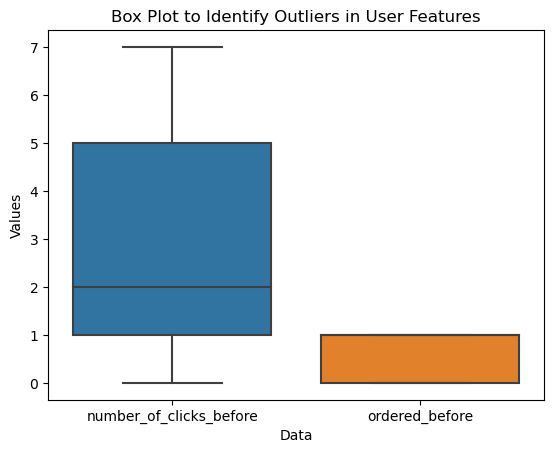

In [14]:
# Draw plots to find outliers in User Features
# Create a box plot to visualize the outliers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=userFeatures.drop(columns=['user_id']).copy())

# Set the title and labels
plt.title("Box Plot to Identify Outliers in User Features")
plt.xlabel("Data")
plt.ylabel("Values")

# Show the plot
plt.show()


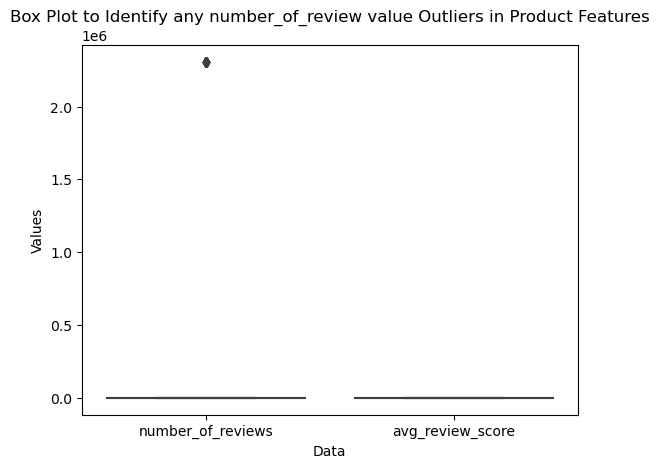

In [15]:
# Draw plots to find outliers in Product Features
# Create a box plot to visualize the outliers
sns.boxplot(data=productFeatures.drop(columns=['product_id', 'on_sale']).copy())

# Set the title and labels
plt.title("Box Plot to Identify any number_of_review value Outliers in Product Features")
plt.xlabel("Data")
plt.ylabel("Values")
# plt.yticks(np.arange(1000000, 10000000, 1000000))
# Show the plot
plt.show()


In [16]:
# Lets double check the outlier in "number_of_reviews" column by checking the min,max and mean
productFeatures['number_of_reviews'].describe()

# It is evident from below data that minimum value is 66 while the maximum value is 2307390. 


count    1.000000e+03
mean     1.157725e+05
std      5.028997e+05
min      6.600000e+01
25%      2.570000e+02
50%      4.710000e+02
75%      7.042500e+02
max      2.307390e+06
Name: number_of_reviews, dtype: float64

In [17]:
# As seen above, "number_of_reviews" has some outliers
# Find and remove outliers
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = productFeatures['number_of_reviews'].quantile(0.25)
Q3 = productFeatures['number_of_reviews'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out rows where the 'number_of_reviews' value is outside the defined bounds
productFeatures = productFeatures[(productFeatures['number_of_reviews'] >= lower_bound) & (productFeatures['number_of_reviews'] <= upper_bound)]

# Display the filtered data
print(productFeatures)

     product_id      category  on_sale  number_of_reviews  avg_review_score
0          1134         tools    False                101          3.349452
1          1846      skincare    False                111          5.000000
2          1762     fragrance    False                220          4.882706
3          1254          hair     True                446          5.000000
4          1493          body     True                513         -1.000000
..          ...           ...      ...                ...               ...
995        1541     fragrance    False                312          1.149903
996        1326          body     True                603          1.277216
997        1062          foot     True                705          3.602008
998        1721        makeup     True                306          1.846254
999        1995  men_skincare     True                199          3.576706

[950 rows x 5 columns]


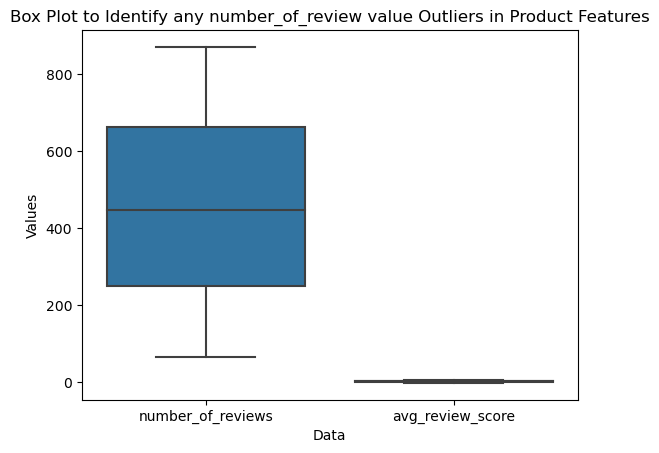

In [18]:
# Redraw box plot to see outliers if any
sns.boxplot(data=productFeatures.drop(columns=['product_id', 'on_sale']).copy())

# Set the title and labels
plt.title("Box Plot to Identify any number_of_review value Outliers in Product Features")
plt.xlabel("Data")
plt.ylabel("Values")
# Show the plot
plt.show()

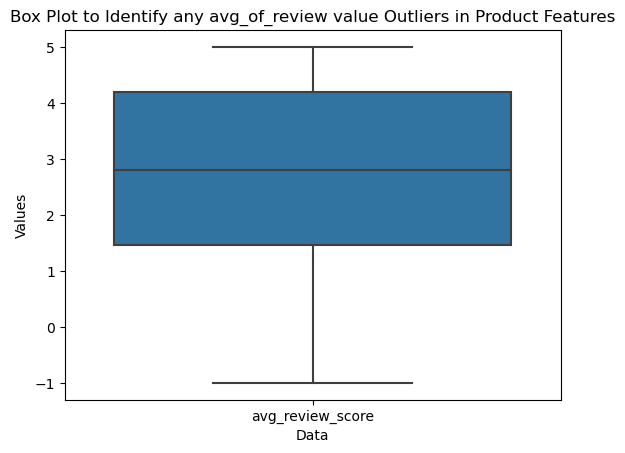

In [19]:
# Check for outlier again
# Create a box plot to visualize the outliers
sns.boxplot(data=productFeatures.drop(columns=['product_id','on_sale', 'category', 'number_of_reviews']).copy())

# Set the title and labels
plt.title("Box Plot to Identify any avg_of_review value Outliers in Product Features")
plt.xlabel("Data")
plt.ylabel("Values")

# Show the plot
plt.show()


In [20]:
# Question 2: EDA and Data Preprocessing

In [21]:
userFeatures.describe()

,user_id,number_of_clicks_before
count,12000.00000,12000.000000
mean,105999.50000,2.725083
std,3464.24595,2.557613
min,100000.00000,0.000000
25%,102999.75000,1.000000
50%,105999.50000,2.000000
75%,108999.25000,5.000000
max,111999.00000,7.000000


In [22]:
# Perform Exploratory Data Analysis (EDA)
userFeatures.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


In [23]:
productFeatures.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


In [24]:
productFeatures.describe()

,product_id,number_of_reviews,avg_review_score
count,950.000000,950.000000,950.000000
mean,1497.295789,457.148421,2.682896
std,288.283006,235.023000,1.751986
min,1000.000000,66.000000,-1.000000
25%,1247.250000,250.000000,1.451847
50%,1497.500000,447.500000,2.802672
75%,1745.750000,663.750000,4.195297
max,1999.000000,872.000000,5.000000


In [25]:
clickHistory.head()

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


In [26]:
clickHistory.describe()

,user_id,product_id
count,35990.000000,35990.000000
mean,106017.080161,1500.232898
std,3483.480090,288.101984
min,100001.000000,1000.000000
25%,102976.500000,1250.000000
50%,106060.000000,1503.000000
75%,109049.000000,1749.000000
max,111999.000000,1999.000000


In [27]:
# Correlation between number of clicks and ordered_before
userFeatures['number_of_clicks_before'].corr(userFeatures['ordered_before'])

0.005140800190072279

In [28]:
# Correlation between number of reviews and avg review
productFeatures['number_of_reviews'].corr(productFeatures['avg_review_score'])

#Below value means number of reviews is indirectly propotional to average reviews

-0.0013829114119640283

In [29]:
# Find duplicates in Click History if any
clickHistory[clickHistory.duplicated()]

,user_id,product_id,clicked


In [30]:
# Find duplicates in User Features if any
userFeatures[userFeatures.duplicated()]

,user_id,number_of_clicks_before,ordered_before,personal_interests


In [31]:
# Find duplicates in Product Features if any
productFeatures[productFeatures.duplicated()]

,product_id,category,on_sale,number_of_reviews,avg_review_score


In [32]:
# Convert 

In [33]:
# Map/Convert all unique categories to integer
# Create a mapping between unique categories and integers
category_mapping = {category: idx for idx, category in enumerate(productFeatures['category'].unique())}

category_mapping

{'tools': 0,
 'skincare': 1,
 'fragrance': 2,
 'hair': 3,
 'body': 4,
 'foot': 5,
 'nail': 6,
 'makeup': 7,
 'men_skincare': 8,
 'hand': 9,
 'men_fragrance': 10}

In [34]:
pd.options.mode.chained_assignment = None  # default='warn'
# Replace the string values in the 'category_column' with their mapped integers
productFeatures['category'] = productFeatures['category'].map(category_mapping)

productFeatures

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,0,False,101,3.349452
1,1846,1,False,111,5.000000
2,1762,2,False,220,4.882706
3,1254,3,True,446,5.000000
4,1493,4,True,513,-1.000000
...,...,...,...,...,...
995,1541,2,False,312,1.149903
996,1326,4,True,603,1.277216
997,1062,5,True,705,3.602008
998,1721,7,True,306,1.846254


In [35]:
# Convert on_sale boolean column to integer
productFeatures['on_sale'] = productFeatures['on_sale'].astype(int)
productFeatures

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,0,0,101,3.349452
1,1846,1,0,111,5.000000
2,1762,2,0,220,4.882706
3,1254,3,1,446,5.000000
4,1493,4,1,513,-1.000000
...,...,...,...,...,...
995,1541,2,0,312,1.149903
996,1326,4,1,603,1.277216
997,1062,5,1,705,3.602008
998,1721,7,1,306,1.846254


In [36]:
type(userFeatures.personal_interests[0])
# So personal_interests is actually a single String instead of just an array of strings.

str

In [37]:
# Convert this string to list of string
import ast

userFeatures['personal_interests'] = userFeatures['personal_interests'].apply(lambda x: ast.literal_eval(x))
type(userFeatures['personal_interests'][0])

list

In [38]:
# Convert order_before column to int in UserFeatures
userFeatures['ordered_before'] = userFeatures['ordered_before'].astype(int)
userFeatures['ordered_before']

0        1
1        1
2        1
3        1
4        1
        ..
11995    1
11996    0
11997    0
11998    1
11999    1
Name: ordered_before, Length: 12000, dtype: int64

In [39]:
# Convert clicked column from boolean to int in Click History
clickHistory['clicked'] = clickHistory['clicked'].astype(int)
clickHistory['clicked']

0        0
1        1
2        0
3        1
4        1
        ..
35985    0
35986    1
35987    0
35988    1
35989    1
Name: clicked, Length: 35990, dtype: int64

In [40]:
# Get Dummies for personal_interests
userFeatures = userFeatures.explode('personal_interests')
userFeatures = pd.get_dummies(userFeatures, columns=['personal_interests'], prefix='', prefix_sep='')
userFeatures

,user_id,number_of_clicks_before,ordered_before,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools
0,104939,2,1,1,0,0,0,0,0,0,0,0,0,0
0,104939,2,1,0,0,0,0,0,1,0,0,0,0,0
0,104939,2,1,0,0,0,0,0,0,0,0,1,0,0
0,104939,2,1,0,0,0,0,1,0,0,0,0,0,0
0,104939,2,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,103190,0,1,0,0,0,0,1,0,0,0,0,0,0
11999,103190,0,1,0,0,0,0,0,0,0,0,1,0,0
11999,103190,0,1,0,1,0,0,0,0,0,0,0,0,0
11999,103190,0,1,1,0,0,0,0,0,0,0,0,0,0


In [41]:
# Merge UserFeature with ClickHistory on 'user_id'
userInfo = pd.merge(userFeatures, clickHistory, on='user_id')
userInfo

,user_id,number_of_clicks_before,ordered_before,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,product_id,clicked
0,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1212,0
1,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1163,0
2,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1687,0
3,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1569,0
4,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181498,108228,7,1,0,0,0,0,0,0,0,1,0,0,0,1777,1
181499,108228,7,1,0,0,0,0,0,0,0,1,0,0,0,1977,1
181500,108228,7,1,0,0,0,0,0,0,0,1,0,0,0,1840,1
181501,108228,7,1,0,0,0,0,0,0,0,1,0,0,0,1375,1


In [42]:
# Merge the result with ProductFeatures on 'product_id'
userProductInfo = pd.merge(userInfo, productFeatures, on='product_id')
userProductInfo

,user_id,number_of_clicks_before,ordered_before,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score
0,104939,2,1,1,0,0,0,0,0,0,0,0,0,0,1212,0,3,1,789,1.461363
1,104939,2,1,0,0,0,0,0,1,0,0,0,0,0,1212,0,3,1,789,1.461363
2,104939,2,1,0,0,0,0,0,0,0,0,1,0,0,1212,0,3,1,789,1.461363
3,104939,2,1,0,0,0,0,1,0,0,0,0,0,0,1212,0,3,1,789,1.461363
4,104939,2,1,0,1,0,0,0,0,0,0,0,0,0,1212,0,3,1,789,1.461363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172701,110815,7,1,1,0,0,0,0,0,0,0,0,0,0,1481,1,8,1,354,5.000000
172702,110815,7,1,0,1,0,0,0,0,0,0,0,0,0,1481,1,8,1,354,5.000000
172703,110815,7,1,0,0,0,0,0,0,0,0,0,0,1,1481,1,8,1,354,5.000000
172704,110815,7,1,0,0,0,0,0,0,0,0,1,0,0,1481,1,8,1,354,5.000000


In [43]:
# Reorder columns after merge. Also we don't need user_id and product_id columns.
new_order = ['category', 'on_sale','number_of_clicks_before','ordered_before', 'number_of_reviews', 'avg_review_score',  
            'body','foot','fragrance','hair','hand','makeup','men_fragrance','men_skincare','nail','skincare',
             'tools', 'clicked']
userProductInfo = userProductInfo[new_order]
print('Final Data set ')
userProductInfo

Final Data set 


,category,on_sale,number_of_clicks_before,ordered_before,number_of_reviews,avg_review_score,body,foot,fragrance,hair,hand,makeup,men_fragrance,men_skincare,nail,skincare,tools,clicked
0,3,1,2,1,789,1.461363,1,0,0,0,0,0,0,0,0,0,0,0
1,3,1,2,1,789,1.461363,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,2,1,789,1.461363,0,0,0,0,0,0,0,0,1,0,0,0
3,3,1,2,1,789,1.461363,0,0,0,0,1,0,0,0,0,0,0,0
4,3,1,2,1,789,1.461363,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172701,8,1,7,1,354,5.000000,1,0,0,0,0,0,0,0,0,0,0,1
172702,8,1,7,1,354,5.000000,0,1,0,0,0,0,0,0,0,0,0,1
172703,8,1,7,1,354,5.000000,0,0,0,0,0,0,0,0,0,0,1,1
172704,8,1,7,1,354,5.000000,0,0,0,0,0,0,0,0,1,0,0,1


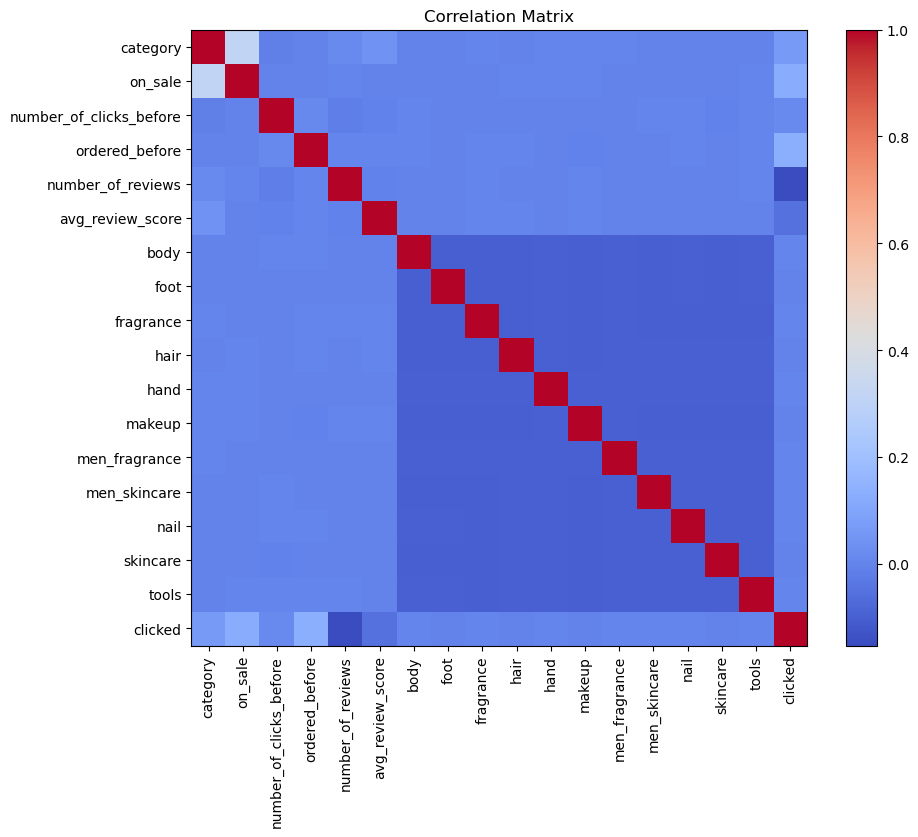

In [44]:
# Plot correlation matrix
import matplotlib.pyplot as plt
corr_matrix = userProductInfo.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Q3: Model Generation and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

#target variable is 'clicked'
X = userProductInfo.drop(columns = ['clicked']).copy()
y = userProductInfo['clicked']

# Standardize the features
scaler = MinMaxScaler()

# Split the data into train and test sets with a ratio of 0.7:0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Assuming the feature data X and the target variable y.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Build and optimize classification models

# Create a Logistic Regression model
logisticRegressionModel = LogisticRegression()

# Train the model
logisticRegressionModel.fit(X_train, y_train)

# Make prediction on test data
y_pred = logisticRegressionModel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Logistic Regression Model :", accuracy)

# Evaluate the model's performance
logisticRegressionModel = classification_report(y_test, y_pred)
logisticRegressionModelDictionary = classification_report(y_test, y_pred, output_dict=True)
logisticRegressionModelDictionary

Test Accuracy of Logistic Regression Model : 0.6182737589747549


{'0': {'precision': 0.652225736945858,
  'recall': 0.8606775559588626,
  'f1-score': 0.7420911248467777,
  'support': 33060},
 '1': {'precision': 0.4373320302956267,
  'recall': 0.19091296928327645,
  'f1-score': 0.2657955304773925,
  'support': 18752},
 'accuracy': 0.6182737589747549,
 'macro avg': {'precision': 0.5447788836207423,
  'recall': 0.5257952626210696,
  'f1-score': 0.5039433276620852,
  'support': 51812},
 'weighted avg': {'precision': 0.5744505731400767,
  'recall': 0.6182737589747549,
  'f1-score': 0.5697083759543452,
  'support': 51812}}

In [47]:
# Build the Naïve Bayes model to predict Labels variable
from sklearn.naive_bayes import GaussianNB

# Create model
NB = GaussianNB()

# Train the Naïve Bayes model:
NB.fit(X_train, y_train)

# Predict the labels for the test set:
y_pred = NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Naive Bayes Model :", accuracy)

# Evaluate the model's performance:
naiveBayesModel = classification_report(y_test, y_pred)
naiveBayesModelDictionary = classification_report(y_test, y_pred, output_dict=True)
naiveBayesModelDictionary

Test Accuracy of Naive Bayes Model : 0.7158766308963175


{'0': {'precision': 0.7411186200005259,
  'recall': 0.8525105868118572,
  'f1-score': 0.7929215490441559,
  'support': 33060},
 '1': {'precision': 0.646230864107959,
  'recall': 0.4749893344709898,
  'f1-score': 0.5475334255417242,
  'support': 18752},
 'accuracy': 0.7158766308963175,
 'macro avg': {'precision': 0.6936747420542424,
  'recall': 0.6637499606414234,
  'f1-score': 0.6702274872929401,
  'support': 51812},
 'weighted avg': {'precision': 0.7067764753526178,
  'recall': 0.7158766308963175,
  'f1-score': 0.7041097276144176,
  'support': 51812}}

In [48]:
# Build the Decision tree model to predict Labels variable
from sklearn.tree import DecisionTreeClassifier

# Create model
DT = DecisionTreeClassifier()

# Train the Decision Tree model:
DT.fit(X_train, y_train)

# Predict the labels for the test set:
y_pred = DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Decision Tree Model :", accuracy)

# Evaluate the model's performance:
decisionTreeModel = classification_report(y_test, y_pred)
decisionTreeModelDictionary = classification_report(y_test, y_pred, output_dict=True)
decisionTreeModelDictionary

Test Accuracy of Decision Tree Model : 0.733594534084768


{'0': {'precision': 0.7693362052085373,
  'recall': 0.8319116757410768,
  'f1-score': 0.7994012411167145,
  'support': 33060},
 '1': {'precision': 0.6540496793874121,
  'recall': 0.5602602389078498,
  'f1-score': 0.6035329599310643,
  'support': 18752},
 'accuracy': 0.733594534084768,
 'macro avg': {'precision': 0.7116929422979748,
  'recall': 0.6960859573244633,
  'f1-score': 0.7014671005238894,
  'support': 51812},
 'weighted avg': {'precision': 0.7276112586286381,
  'recall': 0.733594534084768,
  'f1-score': 0.7285118330878155,
  'support': 51812}}

In [49]:
# Build Neural network model to predict 
from sklearn.neural_network import MLPClassifier

# Build and train the neural network model:
NN = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', random_state=42, max_iter=1000)

# Train the model
NN.fit(X_train, y_train)

# Predict the labels for the test set:
y_pred = NN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Neural Network Model :", accuracy)

# Evaluate the model's performance:
neuralNetworkModel = classification_report(y_test, y_pred)
neuralNetworkModelDictionary = classification_report(y_test, y_pred, output_dict=True)
neuralNetworkModelDictionary


Test Accuracy of Neural Network Model : 0.7566200880104995


{'0': {'precision': 0.7953324475766853,
  'recall': 0.8329098608590442,
  'f1-score': 0.8136875387843148,
  'support': 33060},
 '1': {'precision': 0.6786503781268179,
  'recall': 0.6221203071672355,
  'f1-score': 0.6491569751265929,
  'support': 18752},
 'accuracy': 0.7566200880104995,
 'macro avg': {'precision': 0.7369914128517516,
  'recall': 0.7275150840131399,
  'f1-score': 0.7314222569554538,
  'support': 51812},
 'weighted avg': {'precision': 0.753102420433863,
  'recall': 0.7566200880104995,
  'f1-score': 0.7541399990307905,
  'support': 51812}}

In [ ]:
# Build and evaluate SVC models with different kernel function
from sklearn.svm import SVC

# List of kernel functions to try
kernels = ["linear", "poly", "rbf", "sigmoid"]
# Initialize a dictionary to store the accuracies for each kernel function
accuracy_scores = {}
# Train and evaluate SVC models with different kernel functions
for kernel in kernels:
# Initialize SVC with the specified kernel 
    svc = SVC(kernel=kernel)
    # Fit the model on the training data
    svc.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = svc.predict(X_test) 
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy in the dictionary
    accuracy_scores[kernel] = accuracy

neuralNetworkModel = classification_report(y_test, y_pred)
neuralNetworkModelDictionary = classification_report(y_test, y_pred, output_dict=True)
maxAccuracy = max(accuracy_scores.value())
svmModelDictionary = {'accuracy': maxAccuracy}

print(maxAccuracy)

In [ ]:
# Question 4: Which model has the best performance? What have you learned from the models you built? 
# Ans: For this particular problem, we can rely on "accuracy" attribute. 
# compare which model has the max value of "accuracy"

logisticRegressionModelDictionary['name'] = 'Logistic Regression'
naiveBayesModelDictionary['name'] = 'Naive Bayes'
decisionTreeModelDictionary['name'] = 'Decision Tree'
neuralNetworkModelDictionary['name'] = 'Neural Network'
svmModelDictionary['name'] = 'SVM'

allModels = [logisticRegressionModelDictionary, 
             naiveBayesModelDictionary, 
             decisionTreeModelDictionary, 
             neuralNetworkModelDictionary];

keyFunction = lambda x: x['accuracy']

name = max(allModels, key=keyFunction)['name']

print(f'Best Model before optimization is "{name}" with an accurancy of {format(accuracy_score(y_pred, y_test) * 100, ".2f")}%')


In [ ]:
# As seen above - the best model accuracy is around 75.84%

# Lets try cross validation scores

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

X = userProductInfo.drop(columns=['clicked']).copy() # Features
y = userProductInfo['clicked'] # Target variable which we want to predict

In [ ]:
# Cross validation : Linear Regression 
from sklearn.linear_model import LinearRegression

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Model Generation
lreg_model = linear_model.LinearRegression()

# MAE scores
mae_scores = cross_val_score(lreg_model, X_scaled, y, cv=10, scoring = 'neg_mean_absolute_error')

linear_regression_mean_mae = mae_scores.mean()
print(linear_regression_mean_mae)

In [ ]:
# Cross validation : Decision Tree Regression 
from sklearn.tree import DecisionTreeRegressor

# Initialize the regression tree model
model = DecisionTreeRegressor()

# Perform cross-validation and calculate the MAE score
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
regression_tree_mean_mae = mae_scores.mean()
print(f"Regression Tree Negative Mean Absolute Error: {regression_tree_mean_mae:.4f}")

In [ ]:
# Cross validation : Naive Bayes
from sklearn.tree import DecisionTreeRegressor

# Initialize the Naive Bayes model
model = GaussianNB()

# Perform cross-validation and calculate the MAE score
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
naive_bayes_mean_mae = mae_scores.mean()
print(f"Naive Bayes Negative Mean Absolute Error: {naive_bayes_mean_mae:.4f}")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

# Initialize the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the neural network model
model = MLPRegressor(10, activation='logistic', max_iter=2000,random_state=42, tol=1e-4, learning_rate_init=0.01)


# Perform cross-validation and calculate MAE score
mae_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')
neural_network_mean_mae = mae_scores.mean()
print(f"Neural Network Negative Mean Absolute Error: {neural_network_mean_mae:.4f}")

In [ ]:
# Cross validation : SVM model

# Initialize the regression tree model
model = SVC()

# Perform cross-validation and calculate the MAE score
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
svm_mean_mae = mae_scores.mean()
print(f"SVM Negative Mean Absolute Error: {svm_mean_mae:.4f}")

In [ ]:
# Compare their performance with MAE, which model has better performance? 
dictionary = {
    "Linear Regression": linear_regression_mean_mae,
    "Regression Tree": regression_tree_mean_mae, 
    "Naive Bayes": naive_bayes_mean_mae,
    "Neural Network": neural_network_mean_mae,
    "SVM": svm_mean_mae
}
abs_dict = {key: abs(value) for key, value in dictionary.items()}
model_name = min(abs_dict, key=abs_dict.get)
print(f"Best Model as per cross validation is : {model_name}")


In [ ]:
# Variable that has the max importance
userProductInfo = pd.DataFrame({'variable': userProductInfo.columns[:17], 'importance': DT.feature_importances_})
print(f"Most important variable is : {userProductInfo.loc[userProductInfo['importance'].idxmax()].variable}")